<a href="https://colab.research.google.com/github/mohammedidriss/AWS-Machine-Learning/blob/master/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/GGU/TelcoChurn.csv')

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
print(df.describe(include='all'))
print(df.info())

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

In [19]:
# remove missing rows and duplicate value and remove total charges that are equal to zero

# Remove rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows where 'TotalCharges' is equal to zero
df = df[df['TotalCharges'] != 0]

# Make sure TotalChareges has a numeric value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [21]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['SeniorCitizen'].dtype #//check if code is working
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])
df.drop_duplicates(inplace=True) # Remove duplicates
df.describe()


<ipython-input-21-ef1131feefa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True) # Remove duplicates


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


from matplotlib import pyplot as plt
_df_0['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TotalCharges'].plot(kind='hist', bins=20, title='TotalCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TotalCharges'].plot(kind='line', figsize=(8, 4), title='TotalCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-20-2a072873fa57>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v + 5, f'{churn_rate[i]:.1f}%', ha='center')


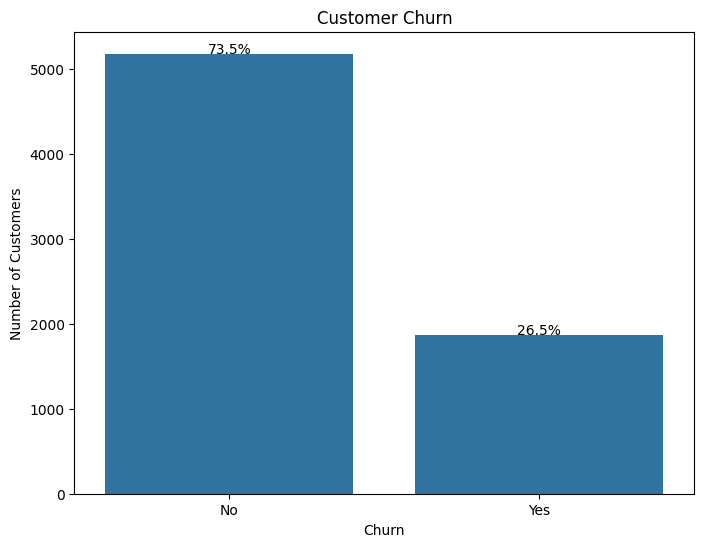

In [20]:
# create a chart that shows the amount of churn customers, show the percentage

import matplotlib.pyplot as plt
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100

# Create the chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Add percentage labels to the bars
for i, v in enumerate(df['Churn'].value_counts()):
    plt.text(i, v + 5, f'{churn_rate[i]:.1f}%', ha='center')

plt.show()


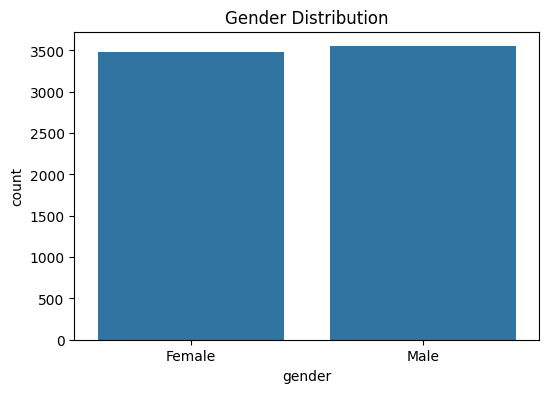

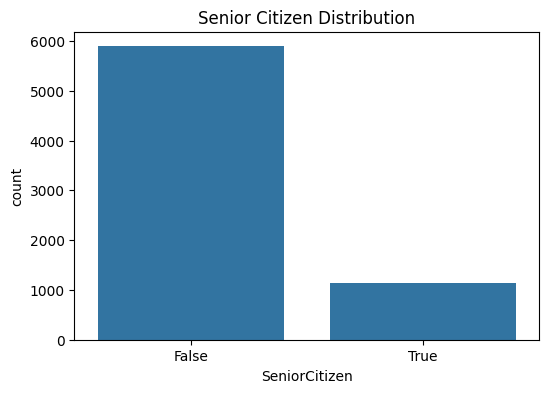

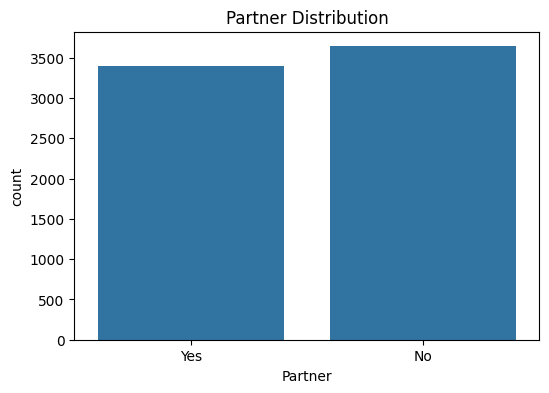

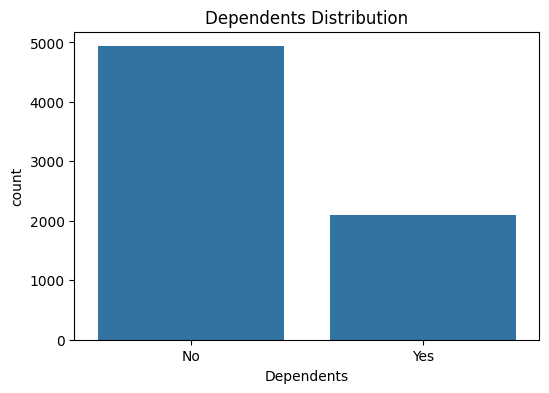

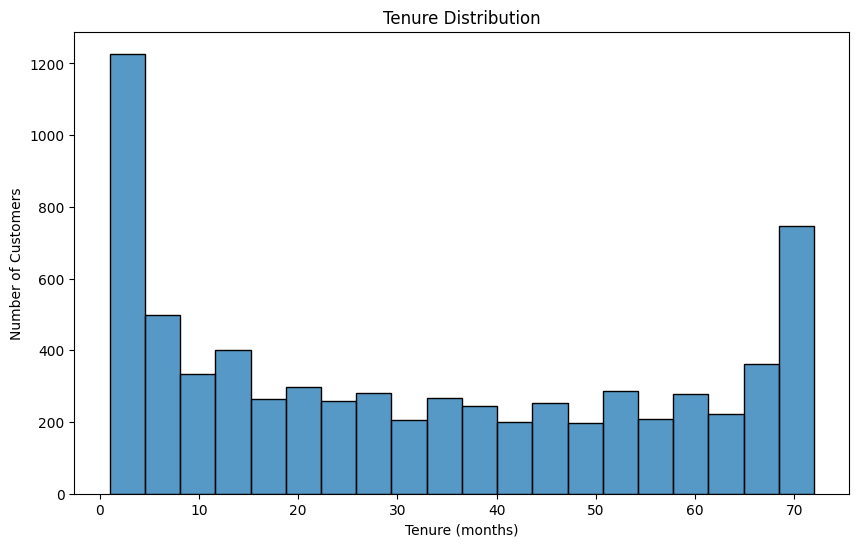

In [22]:
#  show the demographics of the data points for gender, seniorcitizen, dependent, and partner, and tenure. plot all of them on charts

import matplotlib.pyplot as plt
# Demographics analysis and plotting

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Senior Citizen distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen Distribution')
plt.show()

# Partner distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Partner', data=df)
plt.title('Partner Distribution')
plt.show()

# Dependents distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Distribution')
plt.show()

# Tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=20)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()


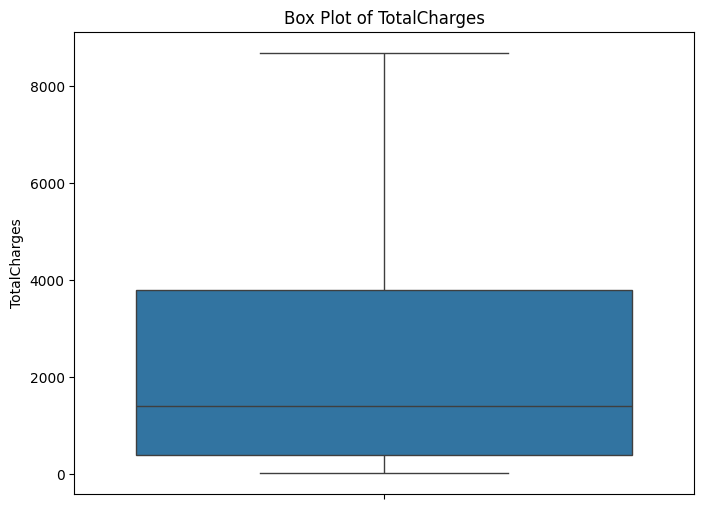

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['TotalCharges'])
plt.title('Box Plot of TotalCharges')
plt.ylabel('TotalCharges')
plt.show()

In [24]:
# test, calculate quantiles and see if there is any outliers - different method than the above box plot:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [36]:
# get feature importance and list the most important features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(feature_importance_df.head(10)) # Print top 10 features


            Feature  Importance
19     TotalCharges    0.152603
18   MonthlyCharges    0.149936
5            tenure    0.136431
0        customerID    0.126720
15         Contract    0.085540
9    OnlineSecurity    0.044376
17    PaymentMethod    0.043136
12      TechSupport    0.036093
8   InternetService    0.023598
10     OnlineBackup    0.023139


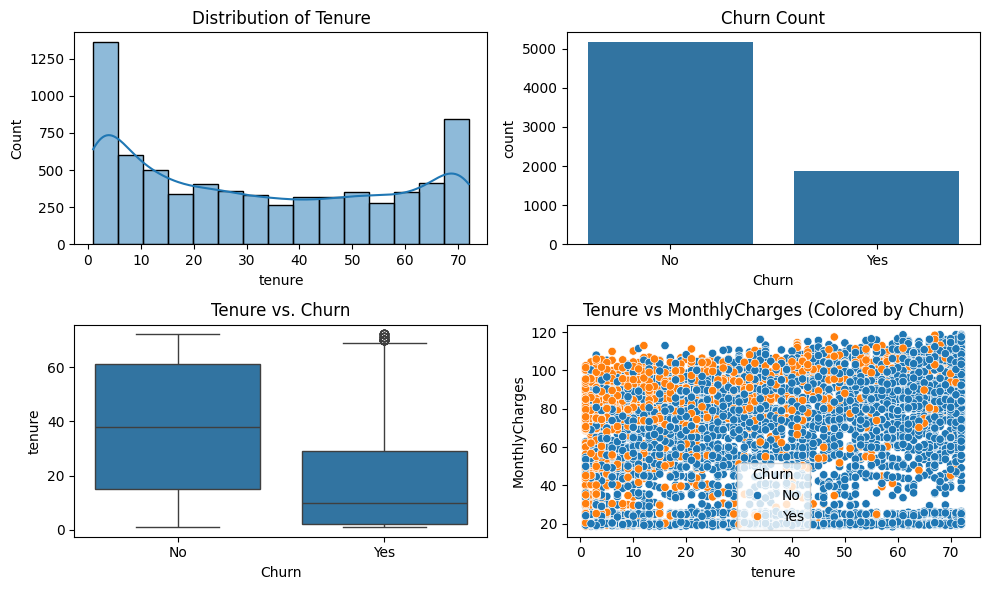

In [26]:
# plot and check Tenure vs Chrun - help to understand the population of churners.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # set figure size

plt.subplot(2, 2, 1)  # Create a subplot (2 rows, 2 columns, first plot)
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')

plt.subplot(2, 2, 2)  # Second plot
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')


plt.subplot(2, 2, 3)  # 3rd plot
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')


plt.subplot(2, 2, 4)  # 4th plot
#  Scatter plot of tenure vs. MonthlyChargers, the dotted chart shows the distribution of the customers/churn
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs MonthlyCharges (Colored by Churn)')

plt.tight_layout() # prevent overlapping
plt.show()


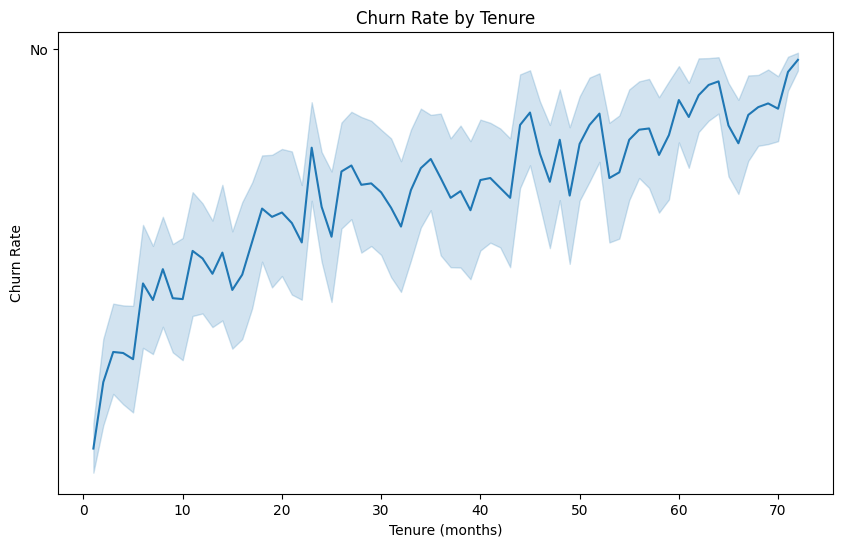

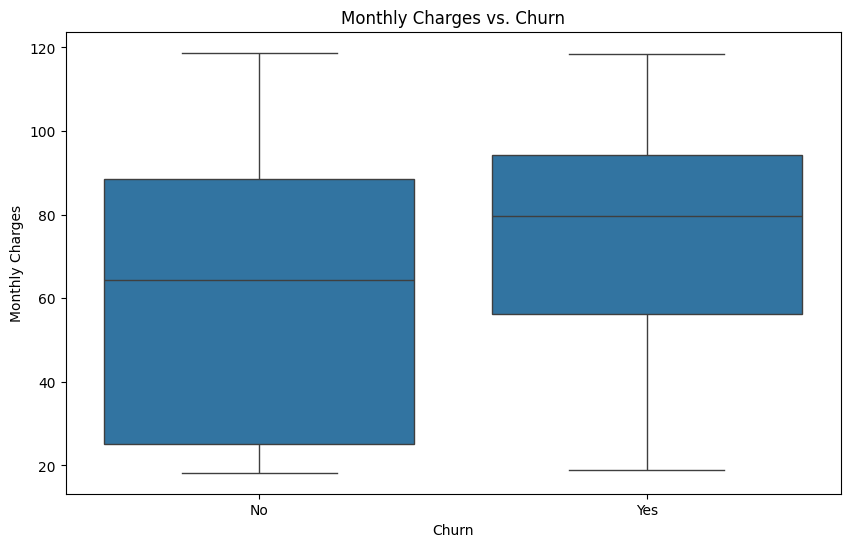

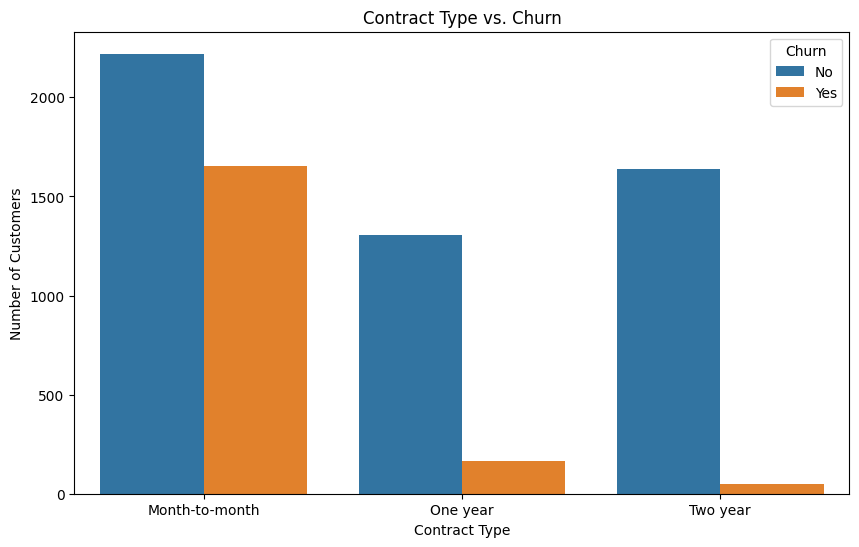

In [27]:
# check the Churn Rate by Tenure - helps to see which customers are leaving whether people who has long tenure or not
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='Churn', data=df, estimator='mean')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure (months)')
plt.show()

# Plot the Monthly Charges vs. Churn - is the cost a reason for people to churn? is it expensive or not
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.ylabel('Monthly Charges')
plt.xlabel('Churn')
plt.show()

# plot Contract Type vs. Churn helps to understand if monthly subscribers are mostly who are churning or not?
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

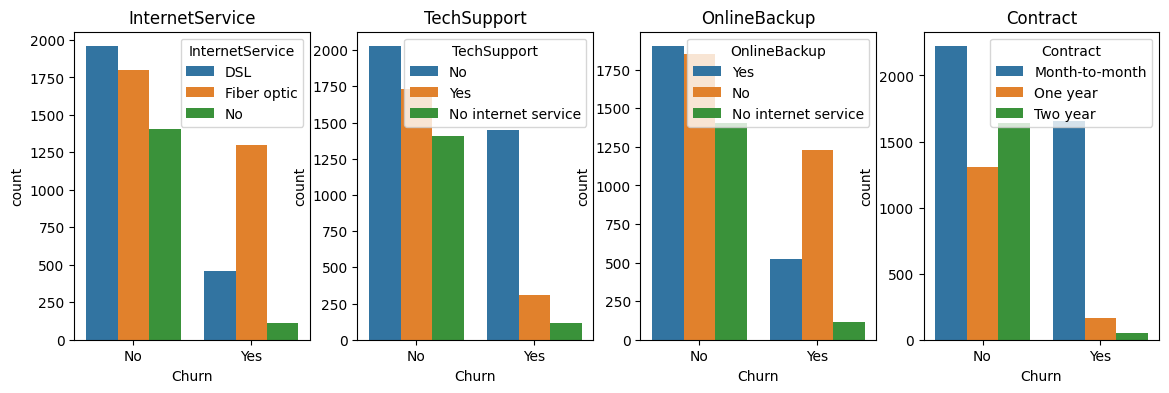

In [28]:
#check if the customers who churn doesn't have technical support, internet service, backup, or a yearly contract
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")


Correlation between tenure and churn: -0.35404935895325074


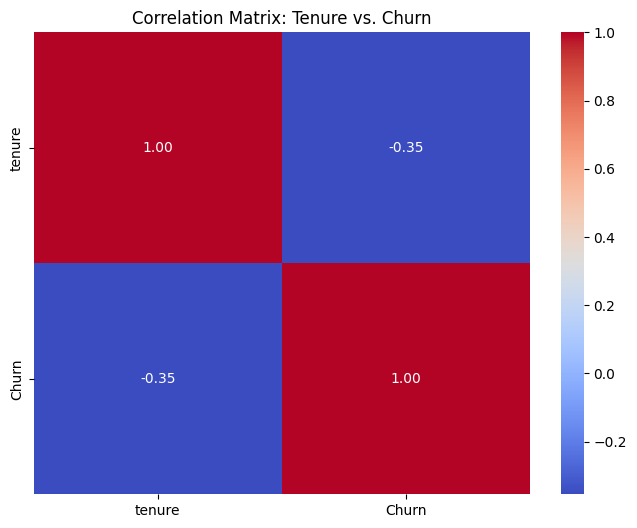

In [29]:

# continue data preperation and make sure the 'Churn' column is numerical (0 and 1)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# check if there is a correlation between tenure and churn and Calculate the correlation between them
correlation = df['tenure'].corr(df['Churn'])
print(f"Correlation between tenure and churn: {correlation}")

# creat a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Tenure vs. Churn')
plt.show()


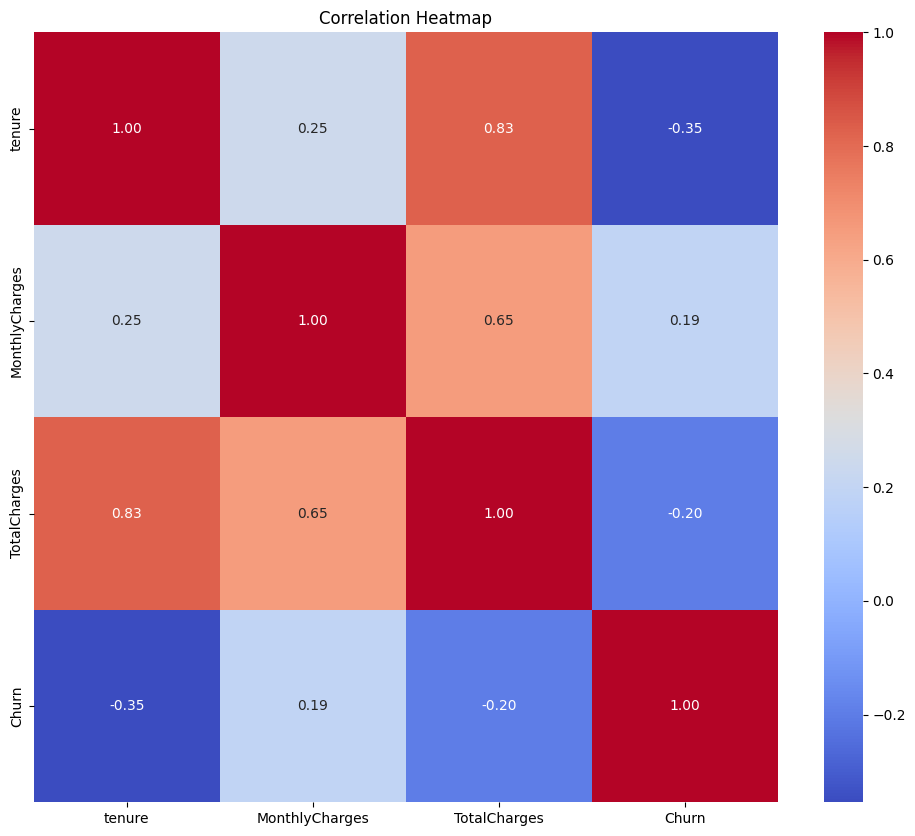

In [30]:
# Select only numeric columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numerical_df.corr()

# creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#check the data before building and training the model - a test step
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Assuming 'df' is your original DataFrame
cat_features = df.select_dtypes(include=['object'])  # Select categorical features

df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[925 108]
 [190 184]]


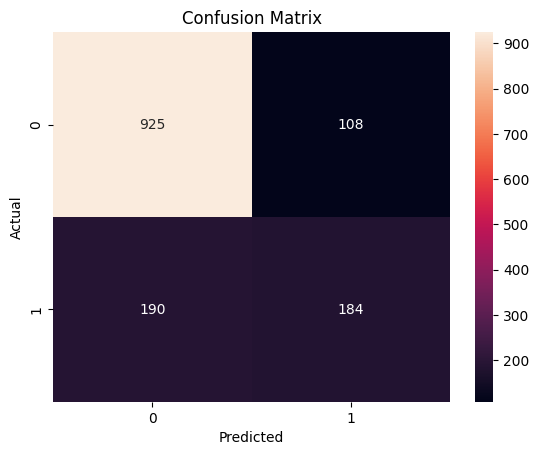

In [41]:
# re-assuring the data is cleaned - clean the data and create a logistic regression model that predicts if the customer will churn or not

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# double-check - this step is not necessary here as it was completed above. convert TotalCharges to numeric, coercing errors to NaN and removing NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df = df[df['TotalCharges'] != 0] # Remove rows with TotalCharges equal to zero

#change the 'SeniorCitizen' to bool
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# encode categorical features and convert the categorical variables to numeric
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


# Feature Scaling to standarize the range of the independent variable
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# test predictions on the test set
y_pred = model.predict(X_test)

# check and evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Replace 'pipeline' with 'model' to use the trained Logistic Regression model
y_pred = model.predict(X_test) # Changed line

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

#re-print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
# create a randomforrest model to test the above data and compare the results with the logistic model

from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from the logistic regression part

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Compare with Logistic Regression results (assuming 'accuracy' from logistic regression is available)
print(f"Logistic Regression Accuracy: {accuracy}")

#Further evaluation with other metrics
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.7860696517412935
Logistic Regression Accuracy: 0.7867803837953091
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

[[935  98]
 [203 171]]


In [34]:
# create a linear regression model

# Import necessary libraries (if not already imported)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' and feature/target variables are defined as in the previous code

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)  # Replace 'Churn' with your target variable column name
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.14703668944436576
R-squared: 0.24657159920006333
